In [1]:
%autosave 60

Autosaving every 60 seconds


In [1]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt

In [22]:
file_path = '/home001/yousung.choi/projects/project_coordination/tools/1_datasets/1_video/Rainbow_Test/'
file_name = '210506_orb_input.mp4'
video_input = file_path + file_name

output_file_name = '210506_orb_output.mp4'
video_output = file_path + output_file_name
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(video_output, fourcc, 10.0, (720, 1640))


In [23]:
orb = cv2.ORB_create(
    nfeatures=100,
    scaleFactor=1.5,
    nlevels=10,
    edgeThreshold=5,
    firstLevel=0,
    WTA_K=2,
    scoreType=cv2.ORB_HARRIS_SCORE,
    patchSize=2,
    fastThreshold=20,
)

def get_features(gray):
    kp, descs = orb.detectAndCompute(gray, None)
    return np.array([np.array([k.pt]).astype(np.float32,) for k in kp])

In [24]:
cap = cv2.VideoCapture(video_input)
print("total frames :", cap.get(cv2.CAP_PROP_FRAME_COUNT))

# 추적 경로를 그리기 위함
color = np.random.randint(0, 255, (100, 3))
# 추적 선을 그리기 위함
lines = None
# 첫번째 frame 을 위함
first_frm = None
prevImage = None

# CalcOpticalFlowPyrLK 중지요건 설정 (??)
lk_params = dict(winSize = (15, 15),
                maxLevel = 5,
                criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))


while(cap.isOpened()):
    ret, frame = cap.read()
    # if valid frame
    if ret:
        image_draw = frame
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # if first frame comes, 
        if prevImage is None:
            print('First Frame')
            prevImage = image
            # 추적선을 그릴 이미지를 프레임 크기에 맞게 생성
            lines = np.zeros_like(frame)
            # 추적 시작을 위한 Feature (특징점) 검출
            prevPt = get_features(prevImage)
            print(prevPt.shape)
            print(prevPt)
        else :
            if cap.get(cv2.CAP_PROP_POS_FRAMES) == 50:
                test_image = image
            nextImage = image
            # Optical Flow 로 next frame의 coner 찾기
            nextPt, status, err = cv2.calcOpticalFlowPyrLK(prevImage, nextImage, prevPt, None, **lk_params)
            
            # 대응점이 있는 코너 선별
            if prevPt is not None and nextPt is not None:
                prevMv = prevPt[status==1]
                nextMv = nextPt[status==1]
            else:
                continue
            
            for i, (p, n) in enumerate(zip(prevMv, nextMv)):
#                 if i == 0:
#                     print(p.shape, n.shape)
                px, py = p.ravel()
                nx, ny = n.ravel()
                
                # 이전 코너와 새로운 코너에 선그리기
                cv2.line(lines, (px, py), (nx, ny), color[i].tolist(), 2)
                # 새로운 코너에 점그리기
                cv2.circle(image_draw, (nx, ny), 2, color[i].tolist(), -1)
            
            # 누적된 추적선을 출력 이미지에 합성
#             print(image.shape, lines.shape)
#             image_draw = cv2.add(image_draw, lines)
            image_draw += lines
            # 다음 프레임을 위한 프레임과 코너점 이월
            prevImage = nextImage
            prevPt = nextMv.reshape(-1, 1, 2)
            
        out.write(image_draw)
        
    # if not vaild frame (EOF)
    else:
        break



total frames : 100.0
First Frame
(98, 1, 2)
[[[  42.       1448.      ]]

 [[ 661.        124.      ]]

 [[ 659.        123.      ]]

 [[ 479.        143.      ]]

 [[ 658.        125.      ]]

 [[  26.       1439.      ]]

 [[ 550.        118.      ]]

 [[ 326.        108.      ]]

 [[ 360.        108.      ]]

 [[ 406.        108.      ]]

 [[ 416.        141.      ]]

 [[  46.       1439.      ]]

 [[ 128.         34.      ]]

 [[  30.       1454.      ]]

 [[ 339.        111.      ]]

 [[ 659.        113.      ]]

 [[  47.       1465.      ]]

 [[ 661.        137.      ]]

 [[ 327.        112.      ]]

 [[ 658.        137.      ]]

 [[ 661.        111.      ]]

 [[ 330.        111.      ]]

 [[ 397.        141.      ]]

 [[  39.       1460.      ]]

 [[ 346.        137.      ]]

 [[ 360.        112.      ]]

 [[  26.       1466.      ]]

 [[ 458.        144.      ]]

 [[ 356.        111.      ]]

 [[ 390.        121.      ]]

 [[ 347.        112.      ]]

 [[ 423.        120.      

In [27]:
        
cap.release()
out.release()

## 그렇다면, out 에다가 실제 변화한 부분만 계산해서 그려보면 제대로 나올까 ? 

In [ ]:
### Test writing if all touched area is covered

total frames : 100.0
(100, 500, 3)


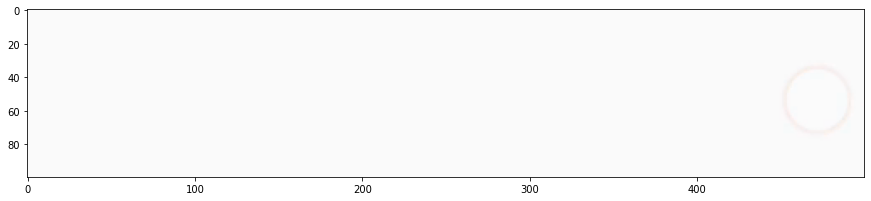

In [73]:
file_path = '/home001/yousung.choi/projects/project_coordination/tools/1_datasets/1_video/Rainbow_Test/'
file_name = '210506_orb_input.mp4'
video_input = file_path + file_name

output_file_name = '210506_orb_output_test.mp4'
video_output = file_path + output_file_name
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(video_output, fourcc, 10.0, (500, 100))
# out = cv2.VideoWriter(video_output, fourcc, 30.0, (720, 1640))

cap = cv2.VideoCapture(video_input)
print("total frames :", cap.get(cv2.CAP_PROP_FRAME_COUNT))

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        frame = frame[350:450,100:600,:]
        
        if cap.get(cv2.CAP_PROP_POS_FRAMES) == 70:
            plt.imshow(frame)
            print(frame.shape)
        out.write(frame)
    else:
        break
        

out.release()
cap.release()

In [6]:
file_path = '/home001/yousung.choi/projects/project_coordination/tools/1_datasets/1_video/Rainbow_Test/'
file_name = '210506_orb_input.mp4'
video_input = file_path + file_name

output_file_name = '210506_orb_output_shrink.mp4'
video_output = file_path + output_file_name
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(video_output, fourcc, 10.0, (500, 100))


In [7]:
orb = cv2.ORB_create(
    nfeatures=100,
    scaleFactor=1.5,
    nlevels=10,
    edgeThreshold=5,
    firstLevel=0,
    WTA_K=2,
    scoreType=cv2.ORB_HARRIS_SCORE,
    patchSize=2,
    fastThreshold=20,
)

def get_features(gray):
    kp, descs = orb.detectAndCompute(gray, None)
    return np.array([np.array([k.pt]).astype(np.float32,) for k in kp])

In [8]:
cap = cv2.VideoCapture(video_input)
print("total frames :", cap.get(cv2.CAP_PROP_FRAME_COUNT))

# 추적 경로를 그리기 위함
color = np.random.randint(0, 255, (100, 3))
# 추적 선을 그리기 위함
lines = None
# 첫번째 frame 을 위함
first_frm = None
prevImage = None

# CalcOpticalFlowPyrLK 중지요건 설정 (??)
lk_params = dict(winSize = (15, 15),
                maxLevel = 5,
                criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))


while(cap.isOpened()):
    ret, frame = cap.read()
    # if valid frame
    if ret: 
        if cap.get(cv2.CAP_PROP_POS_FRAMES) < 21:
            continue
        frame = frame[350:450,100:600,:]
        image_draw = frame
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#         print('n_frame : ', cap.get(cv2.CAP_PROP_POS_FRAMES))
        # if first frame comes, 
        if prevImage is None:
            print('First Frame, image_draw : ', image_draw.shape)
            prevImage = image
            # 추적선을 그릴 이미지를 프레임 크기에 맞게 생성
            lines = np.zeros_like(frame)
            # 추적 시작을 위한 Feature (특징점) 검출
            prevPt = get_features(prevImage)
            print(prevPt.shape)
            print(prevPt)
        else :
            if cap.get(cv2.CAP_PROP_POS_FRAMES) == 20:
                test_image = image
            nextImage = image
            # Optical Flow 로 next frame의 coner 찾기
            nextPt, status, err = cv2.calcOpticalFlowPyrLK(prevImage, nextImage, prevPt, None, **lk_params)
            
            # 대응점이 있는 코너 선별
            if prevPt is not None and nextPt is not None:
                prevMv = prevPt[status==1]
                nextMv = nextPt[status==1]
                print('not continued : ', cap.get(cv2.CAP_PROP_POS_FRAMES))
            else:
                print('continued : ' , cap.get(cv2.CAP_PROP_POS_FRAMES))
                continue
            
            for i, (p, n) in enumerate(zip(prevMv, nextMv)):
#                 if i == 0:
#                     print(p.shape, n.shape)
                px, py = p.ravel()
                nx, ny = n.ravel()
                
                # 이전 코너와 새로운 코너에 선그리기
                cv2.line(lines, (px, py), (nx, ny), color[i].tolist(), 2)
                # 새로운 코너에 점그리기
                cv2.circle(image_draw, (nx, ny), 2, color[i].tolist(), -1)
            
            # 누적된 추적선을 출력 이미지에 합성
#             print(image.shape, lines.shape)
#             image_draw = cv2.add(image_draw, lines)
            image_draw += lines
            # 다음 프레임을 위한 프레임과 코너점 이월
            prevImage = nextImage
            prevPt = nextMv.reshape(-1, 1, 2)
            
        out.write(image_draw)
#         out.write(frame)
        
    # if not vaild frame (EOF)
    else:
        break



total frames : 100.0
First Frame, image_draw :  (100, 500, 3)
(2, 1, 2)
[[[74.25 36.  ]]

 [[87.75 74.25]]]
not continued :  22.0
not continued :  23.0
not continued :  24.0
not continued :  25.0
not continued :  26.0
not continued :  27.0
not continued :  28.0
not continued :  29.0
not continued :  30.0
not continued :  31.0
not continued :  32.0
not continued :  33.0
not continued :  34.0
not continued :  35.0
not continued :  36.0
not continued :  37.0
not continued :  38.0
not continued :  39.0
not continued :  40.0
not continued :  41.0
not continued :  42.0
not continued :  43.0
not continued :  44.0
not continued :  45.0
not continued :  46.0
not continued :  47.0
not continued :  48.0
not continued :  49.0
not continued :  50.0
not continued :  51.0
not continued :  52.0
not continued :  53.0
not continued :  54.0
not continued :  55.0
not continued :  56.0
not continued :  57.0
not continued :  58.0
not continued :  59.0
not continued :  60.0
not continued :  61.0
not continue

In [9]:
        
cap.release()
out.release()

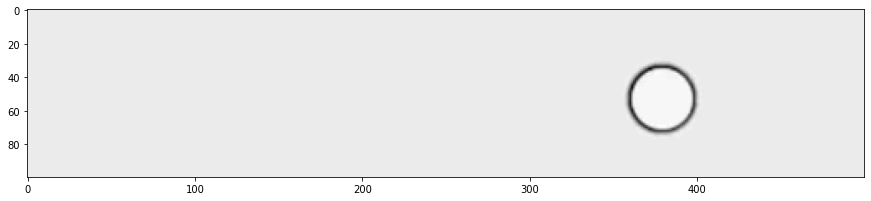

In [54]:
plt.rcParams['figure.figsize'] = [15, 15]
plt.imshow(test_image, 'gray')

# 그러면 동영상 자체에 이런저런 Feature 들이 많이 섞여 들어가 있는 경우에는 어떻게 할 것인지 ? 
1) Detect 한 좌표를 기준으로 50 x 50 을 잘라서 (Cursor 영역) Feature 뽑고\
2) 해당 Feature 를 시작으로 Feature를 Cursor 주변으로 갱신해가면서 Tracking 해보기 ?

In [45]:
file_path = '/home001/yousung.choi/projects/project_coordination/tools/1_datasets/1_video/Rainbow_Test/'
file_name = '210517_orb_input.mp4'
video_input = file_path + file_name

output_file_name = '210517_orb_output.mp4'
video_output = file_path + output_file_name
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(video_output, fourcc, 10.0, (700, 150))


In [46]:
orb = cv2.ORB_create(
    nfeatures=100,
    scaleFactor=1.5,
    nlevels=10,
    edgeThreshold=5,
    firstLevel=0,
    WTA_K=2,
    scoreType=cv2.ORB_HARRIS_SCORE,
    patchSize=2,
    fastThreshold=20,
)

def get_features(gray):
    kp, descs = orb.detectAndCompute(gray, None)
    return np.array([np.array([k.pt]).astype(np.float32,) for k in kp])

In [47]:
cap = cv2.VideoCapture(video_input)
print("total frames :", cap.get(cv2.CAP_PROP_FRAME_COUNT))

# 추적 경로를 그리기 위함
color = np.random.randint(0, 255, (100, 3))
# 추적 선을 그리기 위함
lines = None
# 첫번째 frame 을 위함
first_frm = None
prevImage = None

# CalcOpticalFlowPyrLK 중지요건 설정 (??)
lk_params = dict(winSize = (15, 15),
                maxLevel = 5,
                criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))


while(cap.isOpened()):
    ret, frame = cap.read()
    # if valid frame
    if ret: 
#         if cap.get(cv2.CAP_PROP_POS_FRAMES) < 21:
#             continue
        frame = frame[600:750,:700,:]
        image_draw = frame
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#         if cap.get(cv2.CAP_PROP_POS_FRAMES) == 20:
#             test_image = image
        
#         print('n_frame : ', cap.get(cv2.CAP_PROP_POS_FRAMES))
        # if first frame comes, 
        if prevImage is None:
            print('First Frame, image_draw : ', image_draw.shape)
#             prevImage = image
            prevImage = image[:100, 20:120]
            # 추적선을 그릴 이미지를 프레임 크기에 맞게 생성
            lines = np.zeros_like(frame)
            # 추적 시작을 위한 Feature (특징점) 검출
            prevPt = get_features(prevImage)
            print(prevPt.shape)
#             print(prevPt)
        else :
            if cap.get(cv2.CAP_PROP_POS_FRAMES) == 2:
                test_image = image
                print('Test image is here')
            nextImage = image
            # Optical Flow 로 next frame의 coner 찾기
            nextPt, status, err = cv2.calcOpticalFlowPyrLK(prevImage, nextImage, prevPt, None, **lk_params)
            
            # 대응점이 있는 코너 선별
            if prevPt is not None and nextPt is not None:
                prevMv = prevPt[status==1]
                nextMv = nextPt[status==1]
                print('not continued : ', cap.get(cv2.CAP_PROP_POS_FRAMES))
            else:
                print('continued : ' , cap.get(cv2.CAP_PROP_POS_FRAMES))
                continue
            
            for i, (p, n) in enumerate(zip(prevMv, nextMv)):
#                 if i == 0:
#                     print(p.shape, n.shape)
                px, py = p.ravel()
                nx, ny = n.ravel()
                
                # 이전 코너와 새로운 코너에 선그리기
                cv2.line(lines, (px, py), (nx, ny), color[i].tolist(), 2)
                # 새로운 코너에 점그리기
                cv2.circle(image_draw, (nx, ny), 2, color[i].tolist(), -1)
            
            # 누적된 추적선을 출력 이미지에 합성
#             print(image.shape, lines.shape)
#             image_draw = cv2.add(image_draw, lines)
            image_draw += lines
            # 다음 프레임을 위한 프레임과 코너점 이월
            prevImage = nextImage
            prevPt = nextMv.reshape(-1, 1, 2)
            
        out.write(image_draw)
#         out.write(frame)
        
    # if not vaild frame (EOF)
    else:
        break

plt.imshow(test_image, 'gray')


total frames : 109.0
First Frame, image_draw :  (150, 700, 3)
(81, 1, 2)
[[[32.      55.     ]]

 [[67.      55.     ]]

 [[26.      58.     ]]

 [[50.      62.     ]]

 [[23.      64.     ]]

 [[50.      65.     ]]

 [[77.      65.     ]]

 [[36.      68.     ]]

 [[65.      68.     ]]

 [[38.      71.     ]]

 [[50.      71.     ]]

 [[62.      71.     ]]

 [[43.      72.     ]]

 [[47.      72.     ]]

 [[54.      72.     ]]

 [[42.      74.     ]]

 [[59.      75.     ]]

 [[39.      76.     ]]

 [[61.      80.     ]]

 [[30.      83.     ]]

 [[33.      83.     ]]

 [[62.      83.     ]]

 [[68.      83.     ]]

 [[71.      83.     ]]

 [[39.      87.     ]]

 [[61.      87.     ]]

 [[42.      91.     ]]

 [[59.      91.     ]]

 [[53.      94.     ]]

 [[31.5     55.5    ]]

 [[69.      55.5    ]]

 [[25.5     58.5    ]]

 [[73.5     58.5    ]]

 [[22.5     64.5    ]]

 [[76.5     64.5    ]]

 [[36.      69.     ]]

 [[64.5     69.     ]]

 [[46.5     72.     ]]

 [[54.      72.

error: OpenCV(4.5.1) /tmp/pip-req-build-7m_g9lbm/opencv/modules/video/src/lkpyramid.cpp:1391: error: (-215:Assertion failed) prevPyr[level * lvlStep1].size() == nextPyr[level * lvlStep2].size() in function 'calc'


In [48]:
        
cap.release()
out.release()

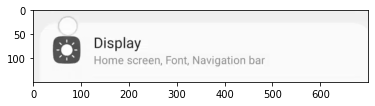

In [34]:
plt.imshow(test_image, 'gray')

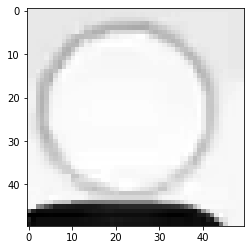

In [37]:
plt.imshow(test_image[10:60, 50:100], 'gray')

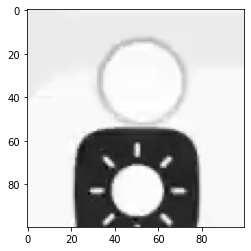

In [41]:
plt.imshow(test_image[:100, 20:120], 'gray')